# Introduction

Our goal in this tutorial is to develop a fan model using alternative assumptions about the retrieval process. In the [first model](Fan_Model_1.ipynb) of the fan effect, the retrieval request was mixture of a person of place slot. Rather than using one randomly selected slot to query memory, the present model will use both person and place slots in the retrieval request. The model will also use partial matching in order to produce memory errors. 
 

## Task

The classic fan experiment was a paired associate recognition task in which subjects learned a series of statements regarding people and places, such as "The lawyer is in the store" (Anderson, 1974). During the test phase, subjects attempted discriminate between target statements, which were in the study list, and foil statements, which were novel statements formed by mismatching people and places used in the target statements (e.g. "The lawyer is in the park"). A key manipulation in this experiment is termed the "fan", which is the number of statements in which a particular person or place appeared. The primary finding, termed the fan effect, was that increasing the fan lead to an increase in reaction time.


| Target    |        | Foil    |       |
|-----------|--------|---------|-------|
| Person    | Place  | Person  | Place |
|-----------|--------|---------|-------|
| lawyer    | store  | fireman | store |
| captain   | cave   | captain | store |
| hippie    | church | giant   | store |
| debutante | bank   | fireman | bank  |
| earl      | castle | captain | bank  |
| hippie    | bank   | giant   | bank  |
| fireman   | park   | lawyer  | park  |
| captain   | park   | earl    | park  |
| hippie    | park   | giant   | park  |


In our simulated fan experiment, we will use a block of nine target and nine foil statements found in the standard ACT-R tutorial. All of the person-place pairs on which the statements are based are listed in table above. On each trial, a person-place pair is presented and the model decides whether the pair was in the study list, responding either "Yes" or  "No" by pressing a key associated with the given response. We simulated the block of trials five times, yielding a total of 90 trials.   

# Fan Model 2


## Declarative memory

Declarative memory $M$ consists 13 chunks representing the person-place relationships. Let $Q= \rm \{person,place\}$ be the set of slots that define the chunk. Note that nine of the chunks correspond to the stimuli in the Target column of the table above.  

### Encoding

On each trial, a person-place pair is presented on a screen. The model locates and encodes each stimulus into a chunk that is stored in the imaginal buffer. Formally, we define the encoded chunk as:

\begin{align}
\mathbf{c_{s,\rm \mathbf{imaginal}}} = \{ (\rm person, v_{s,1}), (place, v_{s,2})\}
\end{align}

where $v_{s,1}$ and $v_{s,2}$ are the values associated with the person and place slots of the chunk in the imaginal buffer. 

### Retrieval Request

Un like Fan Model 1, the present model includes both the person and place slots in the retrievial request. The retrieval request is formed from the stimulus encoded as a chunk in the imaginal buffer, and is defined as: 

\begin{align}
\mathbf{r} = \{(\rm person,c_{s, imaginal}(\rm person),(place,c_{s, imaginal}( place) \} 
\end{align}


### Activation

In the fan model, memory activation for chunk $m$ is defined as: 

\begin{equation}\label{eq:spreadingActivationchunk}
a_m = {\rm blc} + S_m + \epsilon_m
\end{equation}

where blc is the base-level constant parameter, $S_m$ is the spreading activation component, and $\epsilon \sim \rm Normal(0, \sigma)$ is a noise term.

#### Spreading Activation

Spreading activation term for chunk $m$ is defined as:

\begin{align}
S_m = \sum_{b \in B} \sum_{k\in Q_b} W_{b,k}S_{m,k}
\end{align}


where $b$ is a buffer in buffer set $B$, $k$ is a slot of the chunk in buffer $b$ and $Q_b$ is the set of all slots in the chunk in buffer $b$, $W_{b,k}$ is the association weight for slot value $k$ of the chunk in buffer $b$, which is defined as $\frac{1}{|Q_b|}$ by default, and  $S_{m,k}$ is the strength of association for slot value $k$ of chunk $m$. In general, activation can spread from any number of buffers $B$ containing a chunk. In the present model, the set of buffers is defined as $B=\{\rm imaginal\}$ because activation spreads only from the imaginal buffer. Strength of association is defined as:

\begin{align}
S_{m,k} = \gamma + \textrm{ln(fan$_{m,k}$)}
\end{align}

where $\gamma$ is the maximum association value. The fan term is a ratio of the occurrences of slot value $c_{b}(k)$ in chunk $m$ over the number of occurrences of $c_{b}(k)$ across all chunks in declarative memory plus one,

\begin{align}
\textrm{fan}_{m,k} = \frac{C_{b,m,k}}{1+C_{b,k}}
\end{align}


The term $C_{b,m,k}$ represents the number of occurrences of slot value $c_{b}(k)$ in chunk $m$: 

\begin{align}
C_{b,m,k} = \sum_{q \in Q_m} I(c_m(q),c_{b}(k))
\end{align}

where $j$ is a slot value index for chunk $m$, and the indicator function is defined as:

$$ I(x,y) =
  \begin{cases}
    1      & x = y\\
    0  & x \neq y
  \end{cases}
$$

The term $C_{b,k}$ refers to the number of occurrences of slot value slot value $c_{b}(k)$ across all chunks in declarative memory:

\begin{align}
C_{b,k} = \sum_{i \in M} C_{b,i,k}
\end{align}



## Response Mapping 

In Fan Model 1, there is a one-to-one response mapping between the retrieved chunk and the "yes" response and a many-to-one response mapping between the retrieved chunk and the "no" response. The production rule for a yes response $\mathbf{p} = \rm \{(person,c_{s,imaginal}(person), (place,c_{s,imaginal}(place)\}$ is triggered only when the retrieved chunk matches all conditions. All other cases map to a "no" response. More formally, we define the following response mappings for "yes" and "no" responses:

\begin{align}
H_{\rm yes} &= \{\mathbf{c}_m \in M: \forall q \in Q c_m(q) = p(q) \}\\
H_{\rm no} &= \{\mathbf{c}_m \in M: \exists q \in Q \textrm{ s.t. } c_m(q) = p(q) \} \cup m' = \{M \setminus H_{\rm yes} \} \cup \mathbf{c_{m^{\prime}}}\\
\end{align}

On target trials, set $H_{\rm yes}$ only the chunk whose slots match the stimulus. Otherwise, $H_{\rm yes} =\emptyset$. $H_{\rm no}$ is the complimentary set containing all elements in $M$ that are not in $H_{\rm yes}$ plus the retrieval failure $\mathbf{c_{m\prime}}$


## Conflict resolution and perceptual-motor time

As in earlier tutorials, we treat the sum of conflict resolution and perceptual-motor processing time as a constant. Using default ACT-R parameters, this constant sums to:

\begin{align}
 t_\textrm{er} = .845 \rm seconds
\end{align}




See the first figure above for details.

## Likelihood Function 

The likelihood function for Fan Model 1 has two functions: one for "yes" responses, and one for "no" responses. The likelihood of responding "yes" in rt seconds is:

\begin{align}
f_{\textrm{yes}}(\textrm{rt}) 
= \sum_{\mathbf{c_{m}} \in H_{\rm yes}}
g(\textrm{rt}-\textrm{t}_{\textrm{er}}|-\mu_m,\sigma)
\prod_{\mathbf{c_{z}} \in \left\{M\cup \mathbf{c_{m^{\prime}}}  \right\}\setminus \mathbf{c_{m}} }\left[1-G(\textrm{rt}-\textrm{t}_{\textrm{er}}|-\mu_z,\sigma)\right].
\end{align}


The corresponding likelihood for responding "no" in rt seconds is given by:
\begin{align}
f_{\textrm{no}}(\textrm{rt}) 
= \sum_{\mathbf{c_{m}} \in H_{\rm no}}
g(\textrm{rt}-\textrm{t}_{\textrm{er}}|-\mu_m,\sigma)
\prod_{\mathbf{c_{z}}  \in \left\{M\cup \mathbf{c_{m^{\prime}}}  \right\}\setminus \mathbf{c_{m}} }\left[1-G(\textrm{rt}-\textrm{t}_{\textrm{er}}|-\mu_z,\sigma)\right].
\end{align}
 
In both functions, the outer summation marginalizes over the set of chunks $H_{\rm yes}$ or $H_{\rm no}$.

The following summarizes the assumption of the model:


1. The retrieval request is based on both the person and place slots of the encoded stimulus
2. The fan effect is due to spreading activation
3. Each response is independent of others
4. Retrieval times follow a Lognormal Normal Race process 

# Generate Data

Two functions are used to simulate data from Fan Model 1: `simulate` and `simulate_block`. The creates the required chunks for declarative memory, adds them to the ACT-R object, and calls the `simulate_block` function for each repetition. `simulate` function accepts parms the following arguments

- stimuli: an array of `NamedTuples` containing stimulus information
- slots: a `NamedTuple` of person and place slot values
- parms: a `NamedTuple` of fixed parameters
- n_blocks: the number of simulated blocks of trials
- $\gamma$: the maximum association parameter 

The function `simulate_block` accepts the following argument:

- actr: an ACT-R object containing declarative memory, the imaginal module and parameters
- stimuli: an array of `NamedTuples` containing stimulus information
- slots: a `NamedTuple` of person and place slot values

For each stimulus, the function `simulate_block` performs the following operations:

1. Encode simulus into imaginal buffer
2. Randomly choose between retrieving a chunk using the person or place slot as retrieval request
3. Compute the reaction time of the retrieved chunk
4. Record a "yes" response if the slots of the retrieved chunk match the chunk in the imaginal buffer. Otherwise, record a "no" response.
5. Add the reaction time, response and fan values to a `NamedTuple`.

Before proceeding, we will load the required packages.

In [1]:
# change directory to this files containing folder
cd(@__DIR__)
# import package manager
using Pkg
# activate project environment
Pkg.activate("../../..")
# import required packages
using Turing, StatsPlots, ACTRModels, DataFrames
# import required model functions
include("../Common_Functions/Chunks.jl")
include("../Common_Functions/Stimuli.jl")
include("../Common_Functions/Utilities.jl")
include("../Common_Functions/Plotting.jl")
include("Fan_Model_2.jl")
# initialize random number generator
Random.seed!(4520);

  Activating environment at `~/.julia/dev/ACTRTutorial/Project.toml`


In [2]:
function simulate(stimuli, slots, parms, n_blocks; δ, γ)
    #Creates an array of chunks for declarative memory
    chunks = [Chunk(;person=pe, place=pl) for (pe,pl) in zip(slots...)]
    #Creates a declarative memory object that holds an array of chunks and model parameters
    memory = Declarative(;memory=chunks)
    #Initialize imaginal buffer
    imaginal = Imaginal(buffer=chunks[1])
    #Creates an ACTR object that holds declarative memory and other modules as needed
    actr = ACTR(;declarative=memory, imaginal=imaginal, parms..., δ, γ)
    data = Array{Array{<:NamedTuple, 1}, 1}(undef,n_blocks)
    for b in 1:n_blocks
        data[b] = simulate_block(actr, stimuli, slots)
    end
    return vcat(data...)
end

function simulate_block(actr, stimuli, slots)
    @unpack declarative,imaginal = actr
    #Extract ter parameter for encoding and motor response
    ter = get_parm(actr, :ter)
    resp = :_
    data = Array{NamedTuple, 1}(undef,length(stimuli))
    i = 0
    #Counts the fan for each person-place pair
    fanCount = map(x->count_fan(x), slots)
    for (trial,person,place) in stimuli
        i += 1
        #Encode stimulus into imaginal buffer
        imaginal.buffer[1] = Chunk(;person, place)
        #Retrieve chunk given person-place retrieval request
        chunk = retrieve(actr; person, place)
        #Compute the retrieval time of the retrieved chunk and add ter
        rt = compute_RT(actr, chunk) + ter
        if isempty(chunk) || !match(chunk[1]; person, place)
            resp = :no
        else
            resp = :yes
        end
        #Get the fan for the person and place
        fan = get_fan(fanCount, person, place)
        #Record all of the simulation output for the ith trial
        data[i] = (trial=trial,person=person,place=place,fan...,rt=rt,resp=resp)
    end
    return data
end

simulate_block (generic function with 1 method)


In the code block below, we will generate 5 blocks of simulated data, producing a total of 90 trials. 


In [3]:
#True value for the mismatch penalty parameter
δ = 0.5
#True value for the maximum association parameter
γ = 1.6
n_reps = 5
#Fixed parameters used in the model
parms = (blc=.3, τ=-0.5, mmp=true, sa=true, noise=true, s=0.2, ter=.845)
#Generates data for Nblocks. Slots contains the slot-value pairs to populate memory
#stimuli contains the target and foil trials.
temp = simulate(stimuli, slots, parms, n_reps; δ, γ)
#Forces the data into a concrete type for improved performance
data = vcat(temp...)
data[1]

(trial = :target, person = :lawyer, place = :store, fanPerson = 1, fanPlace = 1, rt = 1.178487984599037, resp = :yes)

## Define Log Likelihood Function

Three functions for computing the log likelihood are defined in the code block below. The primary function `computeLL` iterates over data for each trial and accepts the following arguments. 

- parms: a `NamedTuple` of fixed parameters
- slots: a `NamedTuple` of person and place slot values
- data: an array of `NamedTuples` containing stimulus and response information

The function begins by populating declarative memory with chunks and creating an ACT-R object. During each iteration of the for loop, `computeLL` performs the following operations:

1. Create a chunk from the stimlus and it to the imaginal buffer
2. Compute the log likelihood of the data using the person slot as a retrieval request
3. Compute the log likelihood of the data using the place slot as a retrieval request
4. Compute the log mixture weights
5. Compute the log likelihood of the mixture of person and place retrieval requests.

Throughout this process, the function `computeLL` will call `loglike_yes` for "yes" responses and `loglike_no` for "no" responses. The function `loglike_yes` performs the following operations:

1. Create an array of candidate chunks that match the retrieval request
2. Compute the activation of the chunks
3. Compute the log likelihood of retrieving the chunk that matches the chunk in the imaginal buffer

The function `loglike_no` is somewhat more complex due to the many-to-one response mapping between the chunks and the response "no". `loglike_no` performs the following operations:

1. Create an array of candidate chunks that match the retrieval request
2. Compute the activation of the chunks
3. For each chunk that does NOT match the retrieval request, compute its log likelihood and store it in an array
3. Marginalize over each possible response mapping using logsumexp


In [4]:
function computeLL(parms, slots, data; δ, γ)
    act = zero(γ)
    #Creates an array of chunks for declarative memory
    chunks = [Chunk(person=pe, place=pl, act=act) for (pe,pl) in zip(slots...)]
    #Creates a declarative memory object that holds an array of chunks and model parameters
    memory = Declarative(;memory=chunks)
    #Initialize imaginal module
    imaginal = Imaginal(buffer=chunks[1])
    #Creates an ACTR object that holds declarative memory and other modules as needed
    actr = ACTR(;declarative=memory, imaginal, δ, γ, parms...,)
    #Don't add noise to activation values
    actr.parms.noise = false
    #Initializes the log likelihood
    LL = zero(γ)
    #Iterate over each trial in data and compute the Loglikelihood based on the response yes, no and
    for v in data
        #Add stimulus person-pair to imaginal buffer
        imaginal.buffer[1] = Chunk(act=act, person=v.person, place=v.place)
        if v.resp == :yes
            LL += loglike_yes(actr, v.rt; person=v.person, place=v.place)
        else
            LL += loglike_no(actr, v.rt; person=v.person, place=v.place)
        end
    end
    return LL
end

function loglike_yes(actr, rt; request...)
    #Extract required parameters
    @unpack s,τ,ter = actr.parms
    #Subset of chunks that match retrieval request
    chunks = actr.declarative.memory
    #Find index corresponding to "yes" response, which is the stimulus
    choice = find_index(chunks; request...)
    #Compute the activation for each of the matching chunks
    compute_activation!(actr; request...)
    #Collect activation values into a vector
    μ = map(x->x.act, chunks)
    #Add threshold as the last response
    push!(μ, τ)
    #Map the s parameter to the standard deviation for
    #comparability to Lisp ACTR models.
    σ = s*pi/sqrt(3)
    #Create a distribution object for the LogNormal Race model
    dist = LNR(;μ=-μ, σ, ϕ=ter)
    #Compute likelihood of choice and rt given the parameters.
    return logpdf(dist, choice, rt)
end

function loglike_no(actr, rt; request...)
    #Extract required parameters
    @unpack s,τ,ter,δ = actr.parms
    #Subset of chunks that match retrieval request
    chunks = actr.declarative.memory
    #Compute the activation for all chunks
    compute_activation!(actr; request...)
    #Collect activation values into a vector
    μ = map(x->x.act, chunks)
    #Add threshold as the last response
    push!(μ, τ)
    #Map the s parameter to the standard deviation for
    #comparability to Lisp ACTR models.
    σ = s*pi/sqrt(3)
    #Create a distribution object for the LogNormal Race model
    dist = LNR(;μ=-μ, σ, ϕ=ter)
    #Index of the chunk that represents the stimulus
    idx = find_index(chunks; request...)
    #Initialize likelihood
    LLs = Array{typeof(δ), 1}()
    N = length(chunks) + 1
    #Marginalize over all of the possible chunks that could have lead to the
    #observed response
    for i in 1:N
        #Exclude the chunk representing the stimulus because the response was "no"
        if i != idx
            push!(LLs, logpdf(dist, i, rt))
        end
    end
    return logsumexp(LLs)
end

loglike_no (generic function with 1 method)

## Plot Likelihood

The code in the block below superimoses the likelihood against a histogram of similated data for each of the 9 fan permutations. The plots are restricted to "yes" responses on target trials. As you can see, the likelihoods closely match the simulated data, indicating that the likelihood function is correctly specified.  

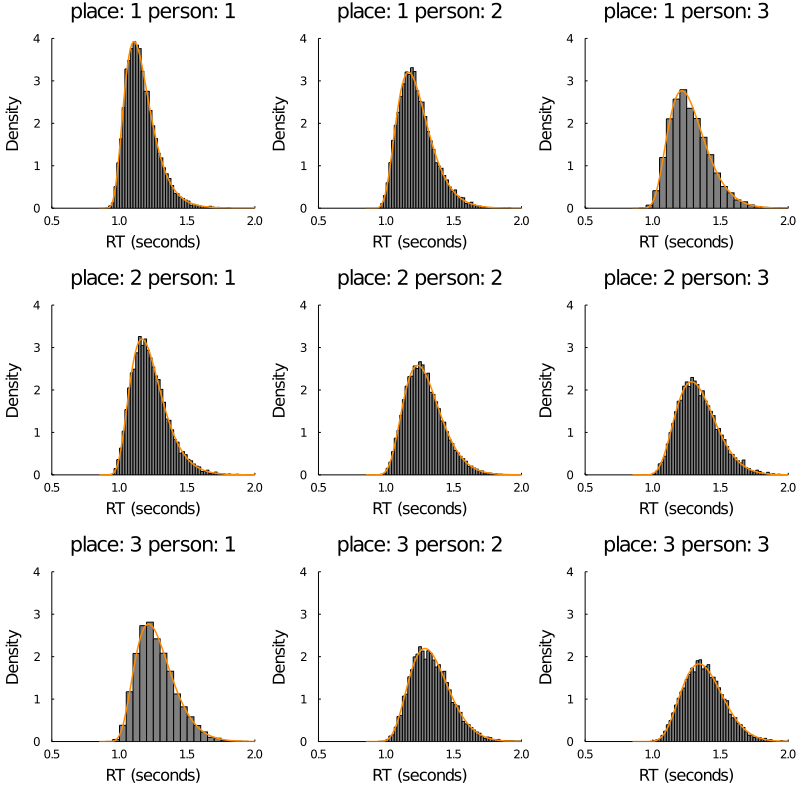

In [5]:
# True value for the maximum association parameter
γ = 1.6
# True value for mismatch penalty parameter
δ = .5
# Number of repeated blocks
n_reps = 5
# Fixed parameters used in the model
# Generates data for n_reps. Slots contains the slot-value pairs to populate memory
temp = simulate(stimuli, slots, parms, 10^4; γ=γ, δ=δ)
# Forces the data into a concrete type for improved performance
sim_data = vcat(temp...)
plots = Plots.Plot[]
idx = 0
title = [string("place: ",i," ","person: ",j) for i in 1:3 for j in 1:3]
title = reshape(title, 1, 9)
idx = 0
for f1 in 1:3
    for f2 in 1:3
        idx += 1
        temp = filter(x->x.fanPerson == f1 && x.fanPlace == f2 && x.trial == :target, sim_data)
        n_total = length(temp)
        temp_yes = filter(x->x.resp == :yes, temp)
        n_yes = length(temp_yes)
        rts = map(x->x.rt, temp_yes)
        p = histogram(rts, norm=true, grid=false, leg=false, xlabel="RT (seconds)", ylabel="Density", size=(600,600), 
            color=:grey, xlims=(.5,2), ylims=(0,4), bins=50, title=title[idx])
        p.series_list[1][:y] *= n_yes/n_total
        x = .85:0.01:2
        t_data = (person=temp_yes[1].person, place=temp_yes[1].place, resp=:yes)
        density = map(x->computeLL(parms ,slots, [(t_data...,rt=x)]; γ=γ, δ=δ) |> exp, x)
        plot!(p, x, density, color=:darkorange, linewidth=1.5)
        push!(plots, p)
    end
end
plot(plots..., layout=(3,3), size=(800,800))

## Define Model

The model and prior distributions are summarized as follows:

$\delta \sim \rm Normal(.5.,.25)$

$\gamma \sim \rm Normal(1.6, .8)$

$\mathbf{\mu} = [\mu_1, \mu_2,\dots, \mu_{n}, \tau]$
 

In computer code, the model is specified as follows:

In [6]:
@model model(data, slots, parms) = begin
    #Prior distribution for mismatch penalty
    δ ~ truncated(Normal(0.5, 0.25), 0., Inf)
    #Prior distribution for maximum association
    γ ~ truncated(Normal(1.6, 0.8), 0., 4.0)
    data ~ Fan(δ, γ, parms, slots)
end

model (generic function with 1 method)

## Estimate Parameters

Now that the priors, likelihood, and Turing model have been specified, we can now estimate the parameters. In the following code, we will run four MCMC chains with the NUTS sample for 2,000 iterations and omit the first 1,000 warmup samples. 

In [7]:
# Settings of the NUTS sampler.
n_samples = 1000
n_adapt = 1000
n_chains = 4
# #Collects sampler configuration options
specs = NUTS(n_adapt, 0.8)
#Start sampling.
chain = sample(model(data, slots, parms), specs, MCMCThreads(), n_samples, n_chains, progress=true)

┌ Info: Found initial step size
│   ϵ = 0.2
└ @ Turing.Inference /home/dfish/.julia/packages/Turing/uAz5c/src/inference/hmc.jl:195
┌ Info: Found initial step size
│   ϵ = 0.05
└ @ Turing.Inference /home/dfish/.julia/packages/Turing/uAz5c/src/inference/hmc.jl:195
┌ Info: Found initial step size
│   ϵ = 0.2
└ @ Turing.Inference /home/dfish/.julia/packages/Turing/uAz5c/src/inference/hmc.jl:195
┌ Info: Found initial step size
│   ϵ = 0.2
└ @ Turing.Inference /home/dfish/.julia/packages/Turing/uAz5c/src/inference/hmc.jl:195


Chains MCMC chain (1000×14×4 Array{Float64, 3}):

Iterations        = 1:1000
Thinning interval = 1
Chains            = 1, 2, 3, 4
Samples per chain = 1000
parameters        = γ, δ
internals         = acceptance_rate, hamiltonian_energy, hamiltonian_energy_error, is_accept, log_density, lp, max_hamiltonian_energy_error, n_steps, nom_step_size, numerical_error, step_size, tree_depth

Summary Statistics
  parameters      mean       std   naive_se      mcse         ess      rhat 
      Symbol   Float64   Float64    Float64   Float64     Float64   Float64 

           γ    1.6133    0.0551     0.0009    0.0014   1331.2126    1.0065
           δ    0.4922    0.0412     0.0007    0.0011   1421.6444    1.0060

Quantiles
  parameters      2.5%     25.0%     50.0%     75.0%     97.5% 
      Symbol   Float64   Float64   Float64   Float64   Float64 

           γ    1.5045    1.5762    1.6129    1.6503    1.7216
           δ    0.4148    0.4646    0.4912    0.5193    0.5735


## Results

A summary of the parameter estimates can be found in the output above. The diagnostic plots below for $\gamma$ and indicate that the chains converged and low autocorrelation was acceptably low. The posterior distributions are centered near the data generating parameter values of $\gamma = 1.6$ indicating good recovery of the parameters.

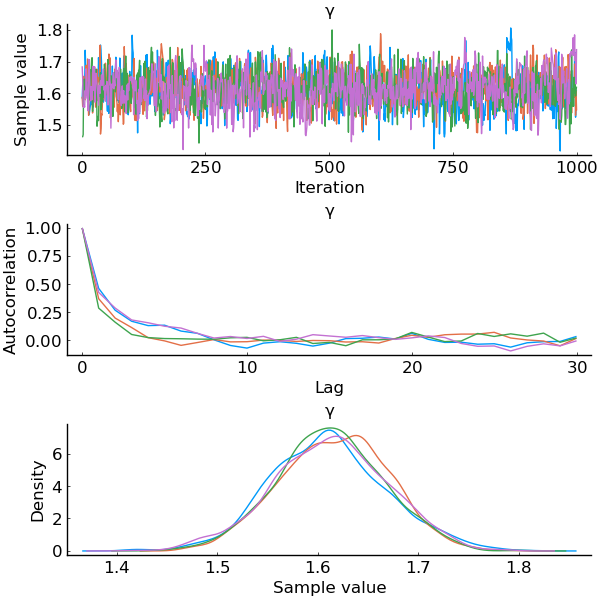

In [8]:
pyplot()
ch = group(chain, :γ)
font_size = 12
p1 = plot(ch, xaxis=font(font_size), yaxis=font(font_size), seriestype=(:traceplot),
  grid=false, size=(250,100), titlefont=font(font_size))
p2 = plot(ch, xaxis=font(font_size), yaxis=font(font_size), seriestype=(:autocorplot),
  grid=false, size=(250,100), titlefont=font(font_size))
p3 = plot(ch, xaxis=font(font_size), yaxis=font(font_size), seriestype=(:mixeddensity),
  grid=false, size=(250,100), titlefont=font(font_size))
pcτ = plot(p1, p2, p3, layout=(3,1), size=(600,600))

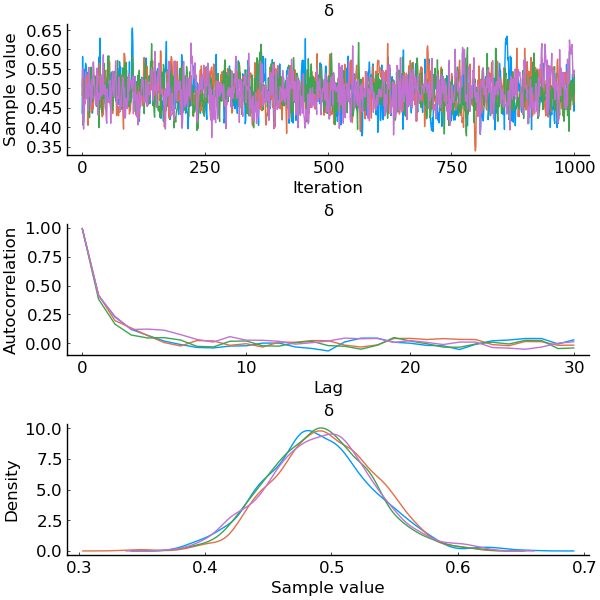

In [9]:
ch = group(chain, :δ)
p1 = plot(ch, xaxis=font(font_size), yaxis=font(font_size), seriestype=(:traceplot),
  grid=false, size=(250,100), titlefont=font(font_size))
p2 = plot(ch, xaxis=font(font_size), yaxis=font(font_size), seriestype=(:autocorplot),
  grid=false, size=(250,100), titlefont=font(font_size))
p3 = plot(ch, xaxis=font(font_size), yaxis=font(font_size), seriestype=(:mixeddensity),
  grid=false, size=(250,100), titlefont=font(font_size))
pcτ = plot(p1, p2, p3, layout=(3,1), size=(600,600))

### Posterior Predictive Distribution

The code block below plots the posterior predictive distributions for correct rts and incorrect rts. As expected, the density for incorrect rts is lower than correct rts, which reflects the fact that incorrect responses are less probable. In addition, incorrect RTs are about .100 seconds slower than correct RTs.

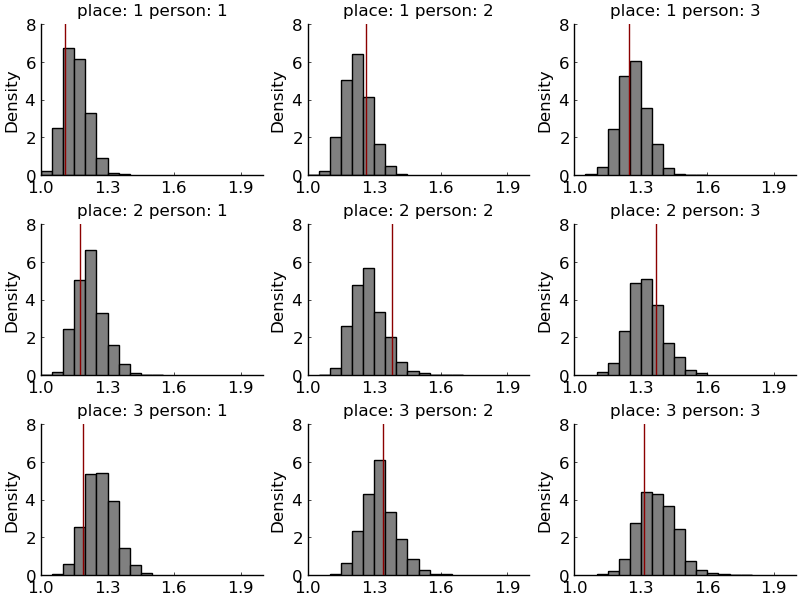

In [10]:
sim(p) = simulate(stimuli, slots, parms, n_reps; p...)
preds = posterior_predictive(x->sim(x), chain, 1000, summarize)
df = vcat(preds...)
fan_effect = filter(x->x.resp == :yes && x.trial == :target, df)
df_data = DataFrame(data)
filter!(x->x.resp == :yes && x.trial == :target, df_data)
groups = groupby(df_data, [:fanPlace,:fanPerson])
data_means = combine(groups, :rt=>mean).rt_mean
title = [string("place: ",i," ","person: ",j) for i in 1:3 for j in 1:3]
title = reshape(title, 1, 9)
p4 = @df fan_effect histogram(:MeanRT,group=(:fanPlace,:fanPerson), ylabel="Density",
    xaxis=font(font_size), yaxis=font(font_size), grid=false, norm=true, color=:grey, leg=false, xticks=[1.0,1.3,1.6,1.9],
    titlefont=font(font_size), title=title, layout=9, xlims=(1.0,2.0), ylims=(0,8), bins=15)
vline!(p4, data_means', color=:darkred, size=(800,600))

# References
Anderson, J. R. (1974). Retrieval of propositional information from long-term memory. Cognitive psychology, 6(4), 451-474.